# IFT6269 - Homework 2 - Linear Classification

**Due**: Thursday, October 17, 2024

#### Name: Grégoire Barrette
#### Student ID: 20175180
#### Collaborators: None



### Introduction

In this assignment you will compare the performance of several algorithm on some synthetic classification tasks. The assignment consists of two parts: 1) a derivation of the estimators for the Fisher LDA with general covariance matrix derivation and 2) the implementation of several classification algorithms.

### Tasks
0.   Get your own copy of this file via "File > Save a copy in Drive...",
1.   Fill your personal information and collaborators at the top of this assignment, and rename the notebook accordingly, e.g., `hw2_thomasBayes.ipynb`
2.   Read the instructions provided on each section and cell carefully,
3.   Answer the section **Math Questions on Fisher LDA**,
4.   Implement the requested algorithms in section **Playground** following the example provided in dummy_model`,
5.   In section **Model Comparison**, for each of the datasets:
    *   use the training data to estimate the parameters of each of the 4 algorithms,
    *   plot the corresponding estimated decision boundary and the training set using the function `plot_results`,
    *   compute the training and test accuracy and fill the table in each section by hand,
    *   compare the performance of each of the algorithms and provide an explanation for your observations based on, for example, their accuracy, overfitting/generalization properties, whether the assumptions of each algorithms are satisfied by the data, etc.
    
**Important**: You are allowed to collaborate with other students in both the math and coding parts of this assignment. However, the answers provided here must reflect your individual work. For that reason, you are not allowed to share this notebook, except for your submission to the TA for grading. **Don't forget to pin and save the version of the notebook you want to be graded on!**

In [4]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

You get 3 different datasets (**A**, **B**, **C**) with a training and test set for each, i.e., 6 sets in total. Each row represents a sample of data $(x_i, y_i)$. There are three columns: the first two give the coordinates for $x_i \in \mathbb{R}^2$; the third column gives the class label $y_i \in \{0, 1\}$. The datasets are all generated from some kind of mixture of Gaussians generative model. The train and test sets are generated from the same distribution for each types of dataset.

To help your interpretation, we give you the actual
generating process. However, keep in mind that normally we would not know the information about the generating process. In this
assignment, we will compare different classification approaches.
*  **Dataset A**: the class-conditionals for this dataset are Gaussians with different means, but with a shared covariance matrix $\Sigma$.
*  **Dataset B**: similar generating process but the covariance matrices are different for the two classes.
*  **Dataset C**: here one class is a mixture of two Gaussians, while the other class is a single Gaussian (with no sharing).

Test the different models learnt from the corresponding training data on these test data. Compute for each model the accuracy (i.e.  the fraction of the data correctly classified) on the training set and compute it as well for the test set. And compare the performances of the different methods on the three datasets.


In [5]:
data = {}

for d_ix in ["A", "B", "C"]:
    for t_flag in ["train", "test"]:
        data[t_flag + "_" + d_ix] = np.loadtxt("hwk2data/classification"+d_ix+"."+t_flag)

### Models

**Fisher LDA**
>  We first consider the Fisher LDA model as seen in class: given the class variable, the data are assumed to be Gaussians with different means for different classes but with the same covariance matrix: $Y \sim \text{Bernoulli}(\pi)$, $X | \{Y = j\} \sim \mathcal{N}(\mu_j, \Sigma)$.

**Logistic Regression**
>  Implement logistic regression for an affine function $f(x) = w^Tx+b$ (do not forget the constant term – you can use the bias feature trick) using the IRLS algorithm (Newton’s method) which was described in class. Hint: never compute the matrix inverse by itself – this is not numerically stable when the Hessian might become ill-conditioned.

**Linear regression**

> As mentioned in class, we can forget that the class $y$ can only take the two values $0$ or $1$ and think of it as a real-valued variable on which we can do standard linear regression (least-squares). Here, the Gaussian noise model on $y$ does not make any sense from a generative point of view; but we can still do least-squares to estimate the parameters of a linear decision boundary (you’ll be surprised by its performance despite coming from a “bad”
generative model!). Implement linear regression (for an affine function $f(x) = w^Tx + b$) by solving the normal equations on each dataset (with no regularization).


**QDA**
>  We finally relax the assumption that the covariance matrices for the two classes are the same. So, given the class label, the data are now assumed to be Gaussian with means and covariance matrices which are a priori different:
$Y \sim \text{Bernoulli}(\pi)$, $X | \{Y = j\} \sim \mathcal{N}(\mu_j, \Sigma_j)$.

## Math Questions on Fisher LDA

This week's math questions will be typed directly in this notebook, i.e., no scanned hand-written answers accepted! You can use standard $\LaTeX$ syntax here!



**Question A:** Derive the form of the maximum likelihood estimator for the Fisher LDA model described above. Hint: you can re-use some of the tricks presented in class for the MLE of a multivariate Gaussian, but adapted to this setting. You can get inspiration from Section 7.2 in Mike’s book (which covers the case where $\Sigma$ is diagonal).

**Answer:**
The Fisher LDA model is has $p(y_n|\pi) = \text{Bernoulli}(\pi) = \pi^{y_n}(1-\pi)^{1-y_n}$ and $p(x_n | y_n, \theta) = \mathcal{N}(\mu_1,\mu_0, \Sigma) = \mathcal{N}(\mu_1,\Sigma)^{y_n}\mathcal{N}(\mu_0,\Sigma)^{1-y_n}$. The log-likelyhood is then
\begin{align}
  \ell(\pi,\mu_1,\mu_0,\Sigma) &= \log p(x,y),\\
  &= \log \prod_{n=1}^Np(y_n|\pi)p(x_n|y_n,\mu_1,\mu_0,\Sigma),\\
  &= \sum_{n=1}^N(\log p(y_n|\pi) + \log p(x_n|y_n,\mu_1,\mu_0,\Sigma))\\
  &=\sum_{n=1}^N\{y_n\log\pi + (1-y_n)\log(1-\pi)+y_n(-\log 2\pi -\frac{1}{2}\log|\Sigma|-\frac{1}{2}(x_n-\mu_1)^T\Sigma^{-1}(x_n-\mu_1))+(1-y_n)(-\log 2\pi\\
  & -\frac{1}{2}\log|\Sigma|-\frac{1}{2}(x_n-\mu_0)^T\Sigma^{-1}(x_n-\mu_0))\}.
\end{align}

Now, for the MLE of $\pi$:
$$\hat{\pi}_{ML} = \text{argmax}_\pi\ell(\pi,\mu_1,\mu_0,\Sigma).$$
That is, I need to take the gradient of the log-likelyhood with respect to $\pi$ and set it to zero. Let me drop all the terms that do not depend on $\pi$ (the $\pi$'s coming from the Gaussians are constants, not the variable):
\begin{align}
  \nabla_\pi \ell(\pi,\mu_1,\mu_0,\Sigma) &= \sum_{n=1}^N\nabla_\pi(y_n\log\pi+(1-y_n)\log(1-\pi))\\
  &\sum_{n=1}^N\frac{y_n}{\pi}-\sum_{n=1}^N\frac{1-y_n}{1-\pi}=0\\
  &\sum_{n=1}^N\frac{y_n}{\pi} = \sum_{n=1}^N\frac{1-y_n}{1-\pi}\\
  &\sum_{n=1}^Ny_n(1-\pi) = \sum_{n=1}^N\pi(1-y_n)\\
  &\sum_{n=1}^Ny_n = \sum_{n=1}^N\pi = N\pi
\end{align}
So
$$\hat{\pi}_{ML} = \frac{\sum_{n=1}^N y_n}{\sum_{n=1}^Ny_n}=\frac{\sum_{n=1}^N y_n}{N}.$$
Things are a little cleaner if we observe that $\sum_n y_n$ essentielly just counts the number of data points in class 1. Let me call this number $N_1$. Then the number of data points in class 0 is $N-N_1 = \sum_n (1-y_N) \equiv N_0$. Using this, the MLE for \pi can be written as
$$\hat{\pi}_{ML} = \frac{N_1}{N}$$
The MLE of $\mu_1$ is
$$\hat{\mu}_{1ML} = \text{argmax}_{\mu_1}\ell(\pi,\mu_1,\mu_0,\Sigma).$$
Let me drop all the terms that do not depend on $\mu_1$:
\begin{align}
\nabla_{\mu_1} \ell(\pi,\mu_1,\mu_0,\Sigma) &= \sum_{n=1}^N\nabla_{\mu_1}(-\frac{y_n}{2}(x_n-\mu_1)^T\Sigma^{-1}(x_n-\mu_1)) = 0\\
&\sum_{n=1}^Ny_n(x_n-\mu_1) = 0\\
&\sum_{n=1}^Ny_nx_n = \sum_{n=1}^Ny_n\mu_1.
\end{align}
So
$$\hat{\mu}_{1ML} = \frac{\sum_{n=1}^Ny_nx_n}{\sum_{n=1}^Ny_n} = \frac{\sum_{n=1}^Ny_nx_n}{N_1}.$$
The MLE for $\mu_0$ is very similar, one just has to replace $y_n$ by $1-y_n$:
$$\hat{\mu}_{1ML} = \frac{\sum_{n=1}^N(1-y_n)x_n}{\sum_{n=1}^N(1-y_n)} = \frac{\sum_{n=1}^N(1-y_n)x_n}{N_0}.$$
Finally, the MLE for $\Sigma$ is
$$\hat{\Sigma}_{ML} = \text{argmax}_{\Sigma}\ell(\pi,\mu_1,\mu_0,\Sigma).$$
Again, taking a gradient with respect to $\Sigma^{-1}$ and setting it equal to zero gives

\begin{align}
\nabla_{\Sigma^{-1}} \ell(\pi,\mu_1,\mu_0,\Sigma) &= \sum_{n=1}^N\nabla_{\Sigma^{-1}}(y_n(-\frac{1}{2}\log|\Sigma|-\frac{1}{2}(x_n-\mu_1)^T\Sigma^{-1}(x_n-\mu_1))+(1-y_n)(-\frac{1}{2}\log|\Sigma|-\frac{1}{2}(x_n-\mu_0)^T\Sigma^{-1}(x_n-\mu_0))) = 0\\
&\sum_{n=1}^N(y_n(-\frac{\Sigma}{2}-\frac{1}{2}(x_n-\mu_1)(x_n-\mu_1)^T)+(1-y_n)(-\frac{\Sigma}{2}-\frac{1}{2}(x_n-\mu_0)(x_n-\mu_0)^T)) = 0\\
&\sum_{n=1}^N\{-\frac{y_n}{2}(x_n-\mu_1)(x_n-\mu_1)^T-\frac{\Sigma}{2} -\frac{1}{2}(1-y_n)(x_n-\mu_0)(x_n-\mu)^T\} = 0\\
&\sum_{n=1}^N\{y_n(x_n-\mu_1)(x_n-\mu_1)^T+(1-y_n)(x_n-\mu_0)(x_n-\mu)^T\} = \sum_{n=1}^N\Sigma = N\Sigma.
\end{align}
Where I've used the facts that $\nabla_{\Sigma^{-1}}\log|\Sigma| = \Sigma$ and $\nabla_{\Sigma^{-1}}\frac{1}{2}(x_n-\mu)^T\Sigma^{-1}(x_n-\mu) = (x_n-\mu)(x_n-\mu)^T$, both of which were proven in class. The MLE for $\Sigma$ is then
$$\hat{\Sigma}_{ML} = \frac{1}{N}\left\{\sum_{n=1}^Ny_n(x_n-\hat{\mu}_{1ML})(x_n-\hat{\mu}_{1ML})^T+\sum_{n=1}^N(1-y_n)(x_n-\hat{\mu}_{0ML})(x_n-\hat{\mu}_{0ML})^T\right\}$$
Again, things are a little cleaner if I introduce other paramters. In particular, let me define
$$\Sigma_0 \equiv\sum_{n=1}^N(x_n-\hat{\mu}_{0ML})(x_n-\hat{\mu}_{0ML})^T, \quad \Sigma_1\equiv\sum_{n=1}^N(x_n-\hat{\mu}_{1ML})(x_n-\hat{\mu}_{1ML})^T,$$
to write
$$\hat{\Sigma}_{ML} = \frac{1}{N_1}\Sigma_1 + \frac{1}{N_0}\Sigma_0.$$



**Question B:** What is the form of the conditional distribution $p(y = 1|x)$? Compare with the form of logistic regression

**Answer:**
From Baye's rule
$$p(y=1 | x) = \frac{p(x|y=1)p(y=1)}{p(x)}.$$

I know everything in the LHS but $p(x)$. However, I know that it is the marginal
$$p(x) = \sum_yp(x,y),$$
and the joint can be decomposed using the chain rule of probability
$$p(x,y) = p(x|y)p(y).$$
Hence,
$$p(y=1|x) = \frac{p(x|y=1)p(y=1)}{\sum_{y=0}^1p(x|y)p(y)}=\frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1)+p(x|y=0)p(y=0)}.$$

Using the functional form of these quantities, I have
\begin{align}
p(y=1|x) &= \frac{\mathcal{N}(\mu_1,\Sigma)\pi}{\mathcal{N}(\mu_1,\Sigma)\pi+\mathcal{N}(\mu_0,\Sigma)(1-\pi)}\\
&=\frac{1}{1 +\frac{\mathcal{N}(\mu_0,\Sigma)(1-\pi)}{\mathcal{N}(\mu_1,\Sigma)\pi}}\\
&=\frac{1}{1+e^{-f(x)}}\\
&= \sigma(f(x)),
\end{align}
where $\sigma(x)$ is the logistic function and I've defined
$$f(x) \equiv \log \frac{\mathcal{N}(\mu_1,\Sigma)\pi}{\mathcal{N}(\mu_0,\Sigma)(1-\pi)}.$$
Let me compute the functional form of $f(x)$:
\begin{align}
f(x) &\equiv \frac{\mathcal{N}(\mu_1,\Sigma)\pi}{\mathcal{N}(\mu_0,\Sigma)(1-\pi)},\\
&= \log\mathcal{N}(\mu_1,\Sigma) -\log\mathcal{N}(\mu_0,\Sigma) +\log\frac{\pi}{1-\pi},\\
&=-\log2\pi-\frac{1}{2}\log|\Sigma|-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)-\left(-\log2\pi -\frac{1}{2}\log|\Sigma|-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)\right) +\log\frac{\pi}{1-\pi},\\
&=\frac{1}{2}\left(-x^T\Sigma^{-1}x+x^T\Sigma^{-1}\mu_1+\mu_1^T\Sigma^{-1}x -\mu_1^T\Sigma^{-1}\mu_1+x^T\Sigma^{-1}x-x^T\Sigma^{-1}\mu_0-\mu_0^T\Sigma^{-1}x+\mu_0^T\Sigma^{-1}\mu_0\right)+\log\frac{\pi}{1-\pi},\\
&= \mu_1^T\Sigma^{-1}x - \mu_0^T\Sigma^{-1}x +\frac{1}{2}(\mu_0^T\Sigma^{-1}\mu_0-\mu_1^T\Sigma^{-1}\mu_1)+\log\frac{\pi}{1-\pi},\\
&=w^T\tilde{x}.
\end{align}
where I've defined
$$w \equiv \begin{pmatrix}
\mu_1^T\Sigma^{-1}-\mu_0^T\Sigma^{-1}\\
\frac{1}{2}(\mu_0^T\Sigma^{-1}\mu_0-\mu_1^T\Sigma^{-1}\mu_1^T) +\log\frac{\pi}{1-\pi}
\end{pmatrix};\quad\tilde{x}\equiv\begin{pmatrix}
x\\
1
\end{pmatrix}.$$
This is very reminiscent of the logistic regression models. If the distribution is from the exponential family
$$p(x|\eta) = \frac{h(x)}{\exp(A(\eta))}\exp(\eta^TT(x)),$$
then logistic regression takes the form
$$p(Y=1|x) = \sigma(f(x)),$$
with
$$f(x)\equiv w^T\phi(x),\quad w^T = \begin{pmatrix}
\eta_1-\eta_0\\
A(\eta_0)-A(\eta_1) +\log\frac{\pi}{1-\pi}
\end{pmatrix},\quad \phi(x)\equiv\begin{pmatrix}
T(x)\\
1
\end{pmatrix}.$$
So the functional form of $w^T$ in both models is different, and in logistic regression, the argument of the sigmoid function may be non-linear, as opposed to Fisher LDA where (the argument of the sigmoid) is linear in $x$.


**Question C:** Show that the decision function of QDA (with a probability threshold at $p(y=1\mid x) = 0.5$) is the graph of a quadratic function. What happens when the covariance matrices are equal $\Sigma_{0} = \Sigma_{1}$ (connect it to the previous questions)?

_Hint: The graph of a quadratic function is characterized by the implicit equation $x^{T}Ax + b^{T}x + c = 0$, with a matrix $A$, a vector $b$ and a scalar $c$._

**Answer:**
The likelyhood for class $j$ is 

$$p(x|Y = j) = \frac{1}{2\pi \sqrt{|\Sigma_j|}}\exp\left(-\frac{1}{2}(x-\mu_j)^T\Sigma_j^{-1}(x-\mu_j)\right).$$

We can find the posterior using Baye's rule:
$$ p(Y=1|x) = \frac{p(x|Y=1)p(Y = 1)}{p(x)},$$
and
$$ p(Y=0|x) = \frac{p(x|Y=0)p(Y = 0)}{p(x)}.$$
Since we have a probability threshold at $p(y=1|x) = 0.5$, I have that $p(y=0|x) = 1 - p(y=1|x) = 1-0.5 = 0.5$. So the two posteriors are equal and I can write
\begin{align*}
p(x|Y=1)p(Y = 1) = p(x|Y=0)p(Y = 0).
\end{align*}
Using the functional form of the likelyhoods:
\begin{align*}
\frac{1}{2\pi \sqrt{|\Sigma_1|}}\exp\left(-\frac{1}{2}(x-\mu_1)^T\Sigma_1^{-1}(x-\mu_1)\right)p(Y=1) = \frac{1}{2\pi \sqrt{|\Sigma_0|}}\exp\left(-\frac{1}{2}(x-\mu_0)^T\Sigma_0^{-1}(x-\mu_0)\right)p(Y = 0).
\end{align*}
Taking the log on both sides:
\begin{align*}
\log 2\pi -\frac{1}{2}\log|\Sigma_1| -\frac{1}{2}(x-\mu_1)^T\Sigma_1^{-1}(x-\mu_1)+\log p(Y = 1) &= \log 2\pi -\frac{1}{2}\log|\Sigma_0| -\frac{1}{2}(x-\mu_0)^T\Sigma_0^{-1}(x-\mu_0)+\log p(Y = 0),\\
\end{align*}
Grouping the constants together, I have
\begin{align*}
-(x-\mu_1)^T\Sigma_1^{-1}(x-\mu_1) +(x-\mu_0)^T\Sigma_0^{-1}(x-\mu_0) &= \text{constant},\\
-x^T\Sigma_1^{-1}x+x^T\Sigma_1^{-1}\mu_1+\mu_1^T\Sigma_1^{-1}x-\mu_1^T\Sigma_1^{-1}\mu_1 - (-x^T\Sigma_0^{-1}x+x^T\Sigma_0^{-1}\mu_0+\mu_0^T\Sigma_0^{-1}x-\mu_0^T\Sigma_0^{-1}\mu_0) &= \text{constant},\\
x^T(\Sigma_0^{-1}-\Sigma_1^{-1})x +2(\mu_1^T\Sigma_1^{-1} - \mu_0^T\Sigma_1^{-0}) &= \text{constant}.
\end{align*}
Which is of the form 
$$x^TAx + b^Tx = \text{constant}$$
and so the decision boundary is quadratic, as per the hint.

If the covariance matrices for the classes are the same, i.e. $\Sigma_0 = \Sigma_1 = \Sigma$, then the above simplifies to
$$x^T(\Sigma^{-1}-\Sigma^{-1})x + 2(\mu_1^T\Sigma^{-1} -\mu_0^T\Sigma^{-1})x = \text{constant}$$
$$(\mu_1^T-\mu_0^T)\Sigma^{-1} x = \text{constant}.$$

This model is just Linear Discriminant Analysis (LDA) from questions $A$ and $B$.


## Playground

You are allowed to add as many cells and functions as you wish in this section, but not allowed to change the signature (name and inputs) of the functions!

In [6]:
def dummy_model(X, y):

    """
    This is a dummy model to show you how your solution is expected to look like
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels

        Returns:
            dummy_classifier: dummy classification function
    """

    # Just computing some means and standard deviations, nothing fancy
    mu0, mu1 = X[:, 0].mean(), X[:, 1].mean()
    s0, s1 = X[:, 0].std(), X[:, 1].std()
    print(mu0)

    def dummy_classifier(x0, x1):
        # Note how we use the variables mu0, mu1, s0 and s1 computed from the data
        # to define this function. Their values get stored in the definition
        # of the function itself, meaning that we don't have to store them explicitly.
        return 0.5 * (1 + np.tanh((x0 - mu0)**2/s0 - (x1 - mu1)**2/s1))

    return dummy_classifier

In [85]:
# sigmoid function for LDA, QDA and logistic regression
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def LDA(X, y):
    """
    Estimates the parameters of an LDA model

        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels

        Returns:
            LDA_classifier: function taking two scalar inputs implementing the
                            estimated p(y=1|x)
    """

    # separate data points per class
    X0 = X[y == 0]
    X1 = X[y == 1]

    # number of data points
    N = len(X[:,0])
    N0 = len(X0) # in class 0
    N1 = N - N0 # in class 1

    # MLE for the parameters
    pi = N1 / N
    mu0 = (1 / N0)*np.sum(X0, axis = 0)
    mu1 = (1 / N1)*np.sum(X1, axis = 0)

    sigma0 = (1 / N0)*(X0 - mu0).T@(X0 - mu0)
    sigma1 = (1 / N1)*(X1 - mu1).T@(X1 - mu1)
    sigma = sigma1 +sigma0
    sigma_inv = np.linalg.inv(sigma)

    # weights and bias
    w = mu1.T@sigma_inv - mu0.T@sigma_inv
    bias = 0.5*(mu0.T@sigma_inv@mu0 - mu1.T@sigma_inv@mu1) + np.log(pi / (1 - pi))
    
    # classification function
    def LDA_classifier(x0, x1):

        x = np.array([x0, x1])

        return sigmoid(np.dot(x,w) + bias)
    
    return LDA_classifier

def LogReg(X, y):
    """
    Estimates the parameters of a Logistic Regression model

        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels

        Returns:
            LogReg_classifier: function taking two scalar inputs implementing the
                               estimated p(y=1|x)
    """

    eps = 1e-2 # step size

    # bias trick: add a column of ones
    X = np.c_[np.ones(X.shape[0]), X]

    N, N_features = X.shape # number of data points and features
    # initialize weights
    w = np.ones(N_features)

    # optimization loop
    grad = 1
    
    while np.linalg.norm(grad) > 1e-5:

        # computing the gradient
        z = X@w
        grad = (1 / N)*X.T@(sigmoid(z)- y) 
        
        # computing the Hessian
        S = np.diag(sigmoid(z) * (1 - sigmoid(z)))
        Hessian = X.T@S@X

        # finding the direction of optimal step without inverting the Hessian
        d = np.linalg.lstsq(Hessian, grad, rcond = None)

        # optimization step
        w = w - eps*d[0]
        
        
    def LogReg_classifier(x0, x1):
         
        # adding bias term
        x = np.array([1,x0, x1]) 
        return sigmoid(w.T@x)

    return LogReg_classifier

def LinReg(X, y):
    """
    Estimates the parameters of a Linear Regression model

        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels

        Returns:
            LinReg_classifier: function taking two scalar inputs implementing the
                               estimated f(x)
    """

    # bias trick: add a column of ones
    X = np.c_[np.ones(X.shape[0]), X]
  
    # solving the normal equation for the MLE
    w = np.linalg.inv(X.T@X)@X.T@y

    def LinReg_classifier(x0, x1):

        # add bias term
        x = np.array([1, x0, x1])

        return np.dot(w,x)
    
    return LinReg_classifier


def QDA(X, y):
    """
    Estimates the parameters of a QDA model

        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels

        Returns:
            QDA_classifier: function taking two scalar inputs implementing the
                            estimated p(y=1|x)
    """
    # separate data points per class
    X0 = X[y == 0]
    X1 = X[y == 1]

    # number of data points
    N = len(X[:,0])
    N0 = len(X0) # in class 0
    N1 = N - N0 # in class 1

    # MLE for the parameters
    pi = N1 / N
    mu0 = (1 / N0)*np.sum(X0, axis = 0)
    mu1 = (1 / N1)*np.sum(X1, axis = 0)

    sigma0 = (1 / N0)*(X0 - mu0).T@(X0 - mu0)
    sigma1 = (1 / N1)*(X1 - mu1).T@(X1 - mu1)
    
    sigma0_inv = np.linalg.inv(sigma0)
    sigma1_inv = np.linalg.inv(sigma1)

    # weights and bias
    w_quadratic = 0.5*(sigma0_inv - sigma1_inv)
    w_linear = (mu1.T@sigma1_inv - mu0.T@sigma0_inv)
    bias = 0.5*(mu0.T@sigma0_inv@mu0 - mu1.T@sigma1_inv@mu1 + np.log(np.linalg.det(sigma0) / np.linalg.det(sigma1))) + np.log(pi / (1 - pi))

    def QDA_classifier(x0, x1):
        x = np.array([x0, x1])
        return sigmoid(x.T@w_quadratic@x + w_linear.T@x + bias)

    return QDA_classifier

def classification_error(X, y, classifiers):
    """
    Computes the classification error of classifiers given a labeled data set
    
        Inputs:
            X: [Nx2] matrix of inputs
            y: [N] vector of labels (classes)
            classifiers: [M] list of classifiers 
            
        Output:
            Classification error in percentage of the classifiers on the data set provided
     """
    
    models = ['LDA', 'LogReg', 'LinReg', 'QDA']
    N = len(y)
    M = len(models)

    for j in range(M):

        model = classifiers[j]
        correct = 0
        for i in range(N):

            pred = 0
            x0, x1 = X[i]

            # decision boundary
            if model(x0, x1) > 0.5:
                pred = 1
            
            if pred == y[i]:
                correct += 1

        accuracy = correct * 100 / N

        print('Accuracy for model ', models[j], ' is ', accuracy, '%')


## Model Comparison

You are allowed to change the cell contents unless explicitly noted otherwise. Use the provided cells to type your answers and fill the tables.

### Code for plotting results

In [86]:
# ----------------------------------------------------------------------- #
#                      Do NOT modify this cell
# ----------------------------------------------------------------------- #

def pointwise_eval(f, umatrix, vmatrix):
    """
    Evaluates the function f over a grid given by the matrices u and V

        Inputs:
            f: [callable] function (of two scalar inputs) to be evaluated
            u: [n x m] matrix of values for the first input
            v: [n x m] matrix of values for the second input

        Returns:
            z: [n x m] matrix of function values f(u_ij, v_ij) for i \in [1..n], j \in [1..m]
    """
    n, m = umatrix.shape
    z = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            z[i, j] = f(umatrix[i, j], vmatrix[i,j])
    return z

def plot_results(X, y, classifiers):
    """
    Displays the behavior of the several classifiers via a 2x2 subplot.

        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
            classifiers: [4] list of functions in EXACTLT the following order:
                         ["LDA", "LogReg", "LinReg", "QDA"]

        Output:
            2x2 subplot with showing a scatter plot of the data, a contour plot
            for each classifier function and the level set f(x)=0.5 in black.

    """

    assert len(classifiers) == 4

    labels = ["LDA", "LogReg", "LinReg", "QDA"]

    # Find range in each dimension and setup a meshgrid
    x0_list = np.linspace(X[:, 0].min(), X[:, 0].max(), 250)
    x1_list = np.linspace(X[:, 1].min(), X[:, 1].max(), 250)
    x0_v, x1_v = np.meshgrid(x0_list, x1_list, sparse=False, indexing='ij')

    # Create 2x2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(9, 9))
    (ax1, ax2), (ax3, ax4) = axs

    for ix, ax in enumerate([ax1, ax2, ax3, ax4]):

        # Take an individual classifier
        f = classifiers[ix]

        if not f is None:

            # Evaluate over the meshgrid and plot contour lines
            # Z = f(x0_v, x1_v) # This is old code!!
            Z = pointwise_eval(f, x0_v, x1_v)
            contours = ax.contourf(x0_v, x1_v, Z, 5, cmap='RdBu', alpha=0.2);
            ax.clabel(contours, inline=True, fontsize=10)
            ax.contour(x0_v, x1_v, Z, [0.5], colors='black');

            # Plot the labelled data on top
            ax.scatter(X[y==0, 0], X[y==0, 1], marker="x", c='r');
            ax.scatter(X[y==1, 0], X[y==1, 1], marker="o", facecolors='none', edgecolors='b');
            ax.set_title(labels[ix])

<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
/var/folders/3b/syn17q895x76ff4c_qs9zz400000gn/T/ipykernel_26533/3466929956.py:6: SyntaxWarning: invalid escape sequence '\i'
  """


### Dataset A

#### Parameter estimation and plots

/var/folders/3b/syn17q895x76ff4c_qs9zz400000gn/T/ipykernel_26533/3032900097.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training set A:
Accuracy for model  LDA  is  99.33333333333333 %
Accuracy for model  LogReg  is  100.0 %
Accuracy for model  LinReg  is  98.66666666666667 %
Accuracy for model  QDA  is  99.33333333333333 %


Test set A:
Accuracy for model  LDA  is  98.13333333333334 %
Accuracy for model  LogReg  is  96.53333333333333 %
Accuracy for model  LinReg  is  97.93333333333334 %
Accuracy for model  QDA  is  98.0 %


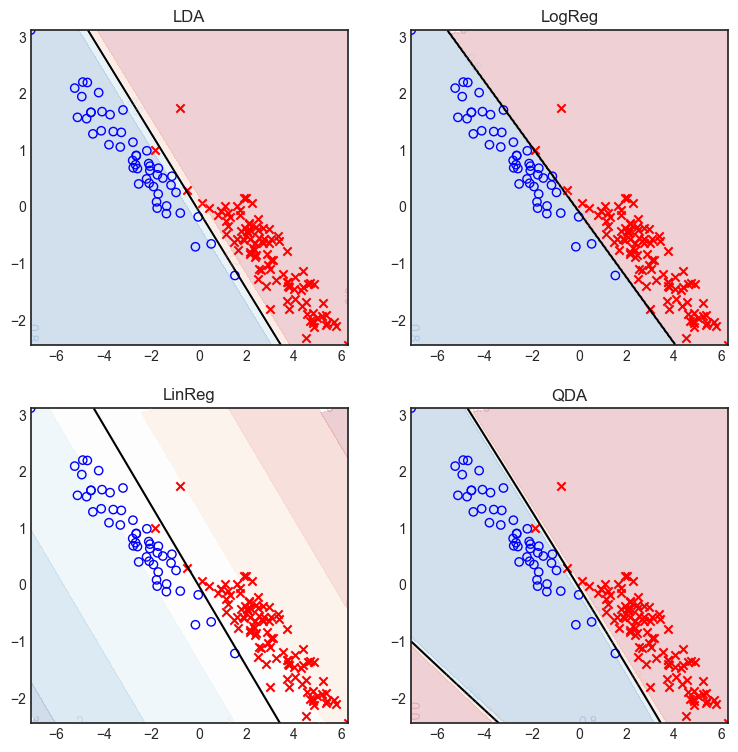

In [87]:
X_train, y_train = data["train_A"][:, 0:2], data["train_A"][:, -1]
X_test, y_test = data["test_A"][:, 0:2], data["test_A"][:, -1]

classifiers = [model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
plot_results(X_train, y_train, classifiers)

# classification error on training set A
print('Training set A:')
classification_error(X_train, y_train, classifiers)

print('\n')
# classification error on test set A 
print('Test set A:')
classification_error(X_test, y_test, classifiers)

#### Comparison


Method | Train Acc. | Test Acc.
--- | --- | ---
*LDA* | 99.3 % | 98.1 %
*LogReg* | 100 % | 96.5 %
*LinReg* | 98.7 % | 97.9 %
*QDA* | 99.3 % | 98.0 %


**Question:** Is the misclassiffication error larger, smaller, or similar on the training and test data? Why?

**Answer:**

For all models the missclassification error is larger (the accuracy is smaller) on the the **test** data. This makes sense because the parameters of all models were computed to best fit the data in the training set. The test set containts data points the model has not seen during training, so the parameters are less optimal for this set. However, the models seem to generalize very well to the test set, as the accuracy is still close the that of the training set.

**Question:** Which methods yield very similar/dissimilar results? Which method yield the best results? Provide an interpretation.

**Answer:**

LDA and QDA yield the same accuracy in both training and testing. I'm a bit surprised by this because I thought that QDA with its quadratic decision boundary would be more flexible in classification than a linear decision boundary. The method of **logistic regression** yields the best results in both training and testing (even reaching perfect accuracy in testing!!). My intuition is that we are solving a highly non-linear equation for the optimization of the parameters, which is probably better than the linear models in linear regression and LDA. However, I thought that QDA would outperform logistic regression, for the same reasons stated above - the quadratic decision boundary. One possible explanation is that the classes seem like they are separated by a straight line, and so QDA is probably not necessary for such data. Another explanation is that the data was generated using two Gaussians with the same covariance matrix, so relaxing the assumption that the covariance is shared in LDA is not necessary. In other words, QDA is overkill for this taks and performs the same as LDA.  

However, QDA generalizes better to the test set than all other models.

 I will also add that the IRLS optimization procedure in the logistic regression model converged pretty fast for this data set (about 7 seconds on my machine).

### Dataset B

#### Parameter estimation and plots

Training set B:
Accuracy for model  LDA  is  97.0 %
Accuracy for model  LogReg  is  98.0 %
Accuracy for model  LinReg  is  97.0 %
Accuracy for model  QDA  is  98.66666666666667 %


Test set B:
Accuracy for model  LDA  is  95.85 %
Accuracy for model  LogReg  is  95.7 %
Accuracy for model  LinReg  is  95.85 %
Accuracy for model  QDA  is  98.0 %


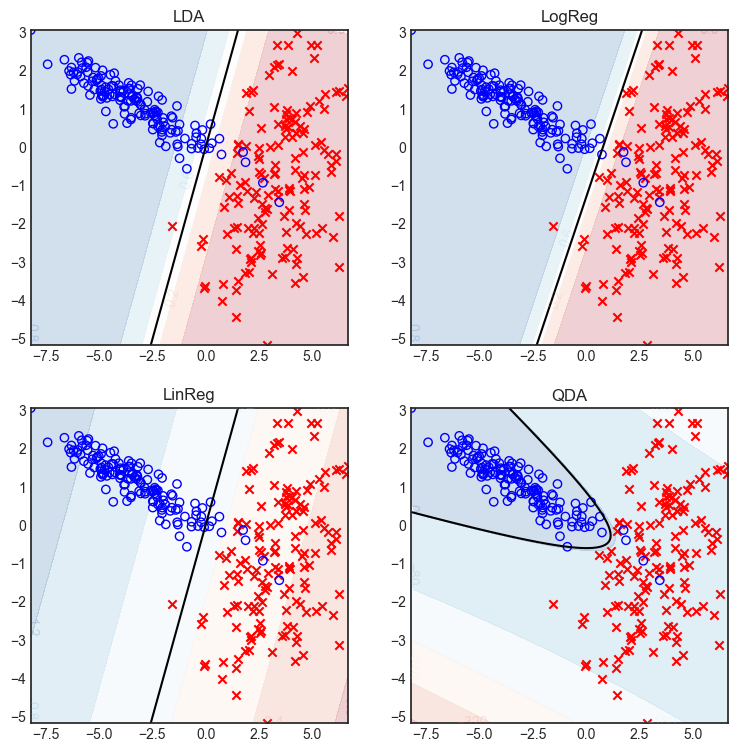

In [77]:
X_train, y_train = data["train_B"][:, 0:2], data["train_B"][:, -1]
X_test, y_test = data["test_B"][:, 0:2], data["test_B"][:, -1]

classifiers = [model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
plot_results(X_train, y_train, classifiers)

# classification error on training set B
print('Training set B:')
classification_error(X_train, y_train, classifiers)

print('\n')
# classification error on test set B
print('Test set B:')
classification_error(X_test, y_test, classifiers)

#### Comparison


Method | Train Acc. | Test Acc.
--- | --- | ---
*LDA* | 97.0 % | 95.9 %
*LogReg* | 98.0 % | 95.7 %
*LinReg* |  97.0 | 95.9 %
*QDA* | 98.7 % | 98.0 %


**Question:** Is the misclassiffication error larger, smaller, or similar on the training and test data? Why?

**Answer:**

The missclassification error is larger on the testing set again. The parameters of the models are optimized to fit the data in the training set, which explains why the models are less performant on the testing set.



**Question:** Which methods yield very similar/dissimilar results? Which method yield the best results? Provide an interpretation.

**Answer:**

The LDA, logistic regression and linear regression methods yield very similar results (within 1% for the training set and within 0.2% for the test set). Here, **QDA** outperforms the other models in both sets, and by a significant margin on the test set. I think that this is due to the distribution of the classes. Here, unlike in dataset A, the separation between the classes is not really linear, and the quadratic decision boundary of QDA is able to capture this separation more efficiently. Also, the data was generated using two Gaussians with different variance, so it makes sense that QDA is the best model here, as it does not assume a shared covariance.

Linear regression performs as well as LDA on both sets, which is quite surprising! Also, logistic regression took more time to converge here (about 1m18s on my machine).

### Dataset C

#### Parameter estimation and plots

Training set C:
Accuracy for model  LDA  is  94.25 %
Accuracy for model  LogReg  is  96.0 %
Accuracy for model  LinReg  is  94.5 %
Accuracy for model  QDA  is  95.5 %


Test set C:
Accuracy for model  LDA  is  95.83333333333333 %
Accuracy for model  LogReg  is  97.73333333333333 %
Accuracy for model  LinReg  is  95.76666666666667 %
Accuracy for model  QDA  is  96.43333333333334 %


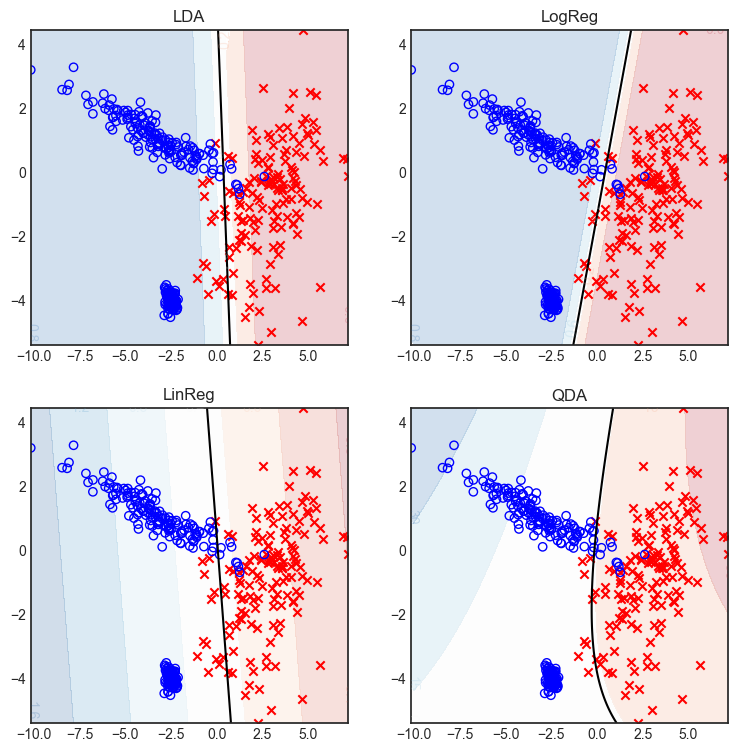

In [78]:
X_train, y_train = data["train_C"][:, 0:2], data["train_C"][:, -1]
X_test, y_test = data["test_C"][:, 0:2], data["test_C"][:, -1]

classifiers = [model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
plot_results(X_train, y_train, classifiers)

# classification error on training set C
print('Training set C:')
classification_error(X_train, y_train, classifiers)

print('\n')
# classification error on test set B
print('Test set C:')
classification_error(X_test, y_test, classifiers)

#### Comparison


Method | Train Acc. | Test Acc.
--- | --- | ---
*LDA* | 94.3 % | 95.8 %
*LogReg* | 96.0 % | 97.7 %
*LinReg* | 94.5 % | 95.8 %
*QDA* | 95.5 % | 96.4 %


**Question:** Is the misclassiffication error larger, smaller, or similar on the training and test data? Why?

**Answer:** The missclassifcation error is smaller on the test set this time. This is surprising, perhaps the classes are more clearly separated in the test set than in the training set. There are points in class 1 that are in the middle of class 0 in the training set, which are impossible for the models to classify correctly.


**Question:** Which methods yield very similar/dissimilar results? Which method yield the best results? Provide an interpretation.

**Answer:** All methods yield sensibly the same results, with linear regression and LDA performing slightly worse than logistic regression and QDA. Like data set A, it is **logistic regression** that performs the best. Here, the data generation process is a bit more complicated, and I suppose that logistic regression, with its non-linear equation to optimize the parameters is able to handle these kind of data more efficientely. The assumptions for LDA, QDA and linear regression are not satisfied by this dataset, which is why they don't perform as well as for the other data sets.

I will add that logistic regression took even more time to converge here (about 2min36s on my machine).